## Extending the Logistic Regression Model with an Application in Airline Passenger Satisfaction Prediction
### Lab 3 report submission for CS7324_SP21

### Team members: Jinyu Du, Hessam Emami 

### Business overview
Airline passenger satisfaction is unique to the airline industry and has key passenger experience measures such as ease of online booking, on-time arrival, boarding process, baggage handling, arrival delay, in-flight services, cleanness [1]. The hit of COVID-19 imposed more challenges on the airline industry and the post COVID-19 era airline passenger satisfaction will also hinge on different aspects such as cleaning/sanitization actions and safety, flexibility with changing schedules, and waving change and cancellation fees [2].  There are nine major airlines and some smaller carriers in the United States. The airline industry is highly competitive. Understanding passengers' satisfaction levels and its key indicators can help airline companies gauge their performance periodically and improve their competitive capabilities.   

This lab project aims to build a generic logistic regression model with different optimization techniques and regularization terms for multi-class classification. The model can predict airline passenger satisfaction based on airline customer survey data. The model should be deployed primarily for offline analysis because there is usually a turnaround time to collect data from surveys, and periodical and offline checks for passenger satisfaction should be sufficient.

### Measure of success

Prediction accuracy for the three categories of the target attribute is the primary measure of success. In other words, we aim for the most accurate classification for airline passenger satisfaction. Filipe, Tonetto, et al. applied a text mining approach to explore airline customer satisfaction using online customer reviews and achieved an accuracy of 79.95%. For applying our logistic regression model to classify passenger satisfaction, we consider 80% accuracy acceptable [3]. Prediction errors are unavoidable with a high-dimensional model. In this context, mistakenly categorizing unsatisfied customers as satisfied is more detrimental than recognizing satisfied customers as unsatisfied. 

A secondary measure of success is comparing our logistic regression model's performance with that from scikit learn in terms of computing time and prediction accuracy.  

The weights of logistic regression can tell us which attributes are more important than others. This will provide insights for the airline to improve aspects of service that have heavier weights.


### An overview of the dataset
The airline passenger satisfaction dataset was downloaded from Kaggle [4]. The data is collected from a customer satisfaction survey, and it is suitable for building classification models. This dataset includes  103904 entries and 24 attributes. 

The dataset can be accessed from here:
<p><a title="Airline Passenger Satisfaction" href="https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction"> Airline Passenger Satisfaction</a></p>

Dataset Author: <a title="T J Klein" href="https://www.kaggle.com/teejmahal20"> T J Klein </a>

#### Purpose of the data
The dataset is suitable for building a classification model that predicts airline passenger satisfaction. The original dataset has a target attribute named "satisfaction" with two categories: "Satisfaction", "neutral or dissatisfaction". We create a new target with three categories based on two attribute named "Customer Type" and "satisfaction". If a customer is satisfied, then the target is 0. If "Customer Type" is "disloyal Customer" and "satisfaction" is "neutral or dissatisfied", then the target is 1.  If "Customer Type" is "Loyal Customer" and "satisfaction" is "neutral or dissatisfied", then the target is 2. Our team intends to build an extended logistic regression model for multi-class prediction and apply our model to the modified dataset for airline passenger satisfaction prediction. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import copy
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
import missingno as mn

In [2]:
dataset_url = 'ds/train.csv'
df = pd.read_csv(dataset_url, index_col=0)

df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
print(df.info())
print(f"Total number of observations in the dateset is {len(df)}.")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
df.shape

(103904, 24)

In [5]:
# show all missing values
total_missing_values = df.isnull().sum().sort_values(ascending = False)
total_missing_values

Arrival Delay in Minutes             310
id                                     0
Gender                                 0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Online boarding                        0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
satisfaction                           0
dtype: int64

In [6]:
#Find abnormal values in dataset
def validate_data(df) :
    valid_attr = np.array([])
    valid_attr = np.append(valid_attr, 
                           {'Gender' : {'Male', 'Female'} == set(df['Gender'].unique())}) 
    valid_attr = np.append(valid_attr,
                           {'Customer Type' : {'Loyal Customer', 'disloyal Customer'} == set(df['Customer Type'].unique())}) 
    valid_attr = np.append(valid_attr,
                           {'Type of Travel' : {'Personal Travel', 'Business travel'} == set(df['Type of Travel'].unique())}) 
    valid_attr = np.append(valid_attr,
                           {'Class' : {'Eco', 'Eco Plus', 'Business'} == set(df['Class'].unique())}) 
    valid_attr = np.append(valid_attr,
                           {'satisfaction' :  {'neutral or dissatisfied', 'satisfied'} == set(df['satisfaction'].unique())}) 
    return valid_attr

print(validate_data(df))
print(df.info())
print("Number of duplicated rows: {}".format(len(df) - len(df.drop_duplicates())))

[{'Gender': True} {'Customer Type': True} {'Type of Travel': True}
 {'Class': True} {'satisfaction': True}]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 

In [7]:
df_imputed = copy.deepcopy(df)

df_imputed = df_imputed.dropna()

for col in ['id', 'Gender', 'Gate location', 'Flight Distance' ] :
        del df_imputed[col]
        
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer Type                      103594 non-null  object 
 1   Age                                103594 non-null  int64  
 2   Type of Travel                     103594 non-null  object 
 3   Class                              103594 non-null  object 
 4   Inflight wifi service              103594 non-null  int64  
 5   Departure/Arrival time convenient  103594 non-null  int64  
 6   Ease of Online booking             103594 non-null  int64  
 7   Food and drink                     103594 non-null  int64  
 8   Online boarding                    103594 non-null  int64  
 9   Seat comfort                       103594 non-null  int64  
 10  Inflight entertainment             103594 non-null  int64  
 11  On-board service                   1035

We removed attributes named 'id', 'Gender', 'Gate location' and 'Flight Distance' from the dataset because they are likely not necessary for predicting passenger satisfaction.

## Convert binary class to three classes

The original dataset has a target attribute named "satisfaction" with two categories: "Satisfaction", "neutral or dissatisfaction". We create a new target with three categories based on two attributes named "Customer Type" and "satisfaction". If a customer is satisfied, then the target is 0. If "Customer Type" is "disloyal Customer" and "satisfaction" is "neutral or dissatisfied", then the target is 1.  If "Customer Type" is "Loyal Customer" and "satisfaction" is "neutral or dissatisfied", then the target is 2. With this modification, the dataset is suitable for building classification models with three or more target classes.

In [8]:
def loyalty_satisfaction(df):
    loyalty_satisfaction = []
    for l, s in zip(df['Customer Type'], df['satisfaction']):
        if s == 'satisfied' :
            loyalty_satisfaction.append(0)
        if s == 'neutral or dissatisfied' and l =='disloyal Customer':
            loyalty_satisfaction.append(1)
        if s == 'neutral or dissatisfied' and l =='Loyal Customer':
            loyalty_satisfaction.append(2)
    return loyalty_satisfaction
 

df_imputed['loyalty_satisfaction'] = loyalty_satisfaction(df_imputed)

In [9]:
# remove the 'Customer Type', 'satisfaction' attributes after 
# a new target attribute is created
for col in ['Customer Type', 'satisfaction']:
    if col in df_imputed:
        del df_imputed[col]

In [10]:
print('satisfied: ',
      df_imputed[df_imputed['loyalty_satisfaction'] == 0 ]['loyalty_satisfaction'].count())
print('disloyal customers and neutral or dissatisfied',
      df_imputed[df_imputed['loyalty_satisfaction'] == 1 ]['loyalty_satisfaction'].count())
print('loyal customers and neutral or dissatisfied',
      df_imputed[df_imputed['loyalty_satisfaction'] == 2 ]['loyalty_satisfaction'].count())

satisfied:  44897
disloyal customers and neutral or dissatisfied 14448
loyal customers and neutral or dissatisfied 44249


In [11]:
df_imputed.head()

,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,loyalty_satisfaction
0,13,Personal Travel,Eco Plus,3,4,3,5,3,5,5,4,3,4,4,5,5,25,18.0,2
1,25,Business travel,Business,3,2,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1
2,26,Business travel,Business,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,0
3,25,Business travel,Business,2,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,2
4,61,Business travel,Business,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,0


## On Hot encoding for categorical attributes

For "Class" and "Type of Travel", we apply one hot encoding

In [12]:
df_imputed['travel_type'] = df_imputed['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})

tmp_df = pd.get_dummies(df_imputed['travel_type'],prefix='travel_type')
df_imputed = pd.concat((df_imputed,tmp_df),axis=1)

tmp_df = pd.get_dummies(df_imputed['Class'],prefix='class')
df_imputed = pd.concat((df_imputed,tmp_df),axis=1)

for col in ['Type of Travel', 'Class', 'travel_type']:
    if col in df_imputed:
        del df_imputed[col]

df_imputed.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,loyalty_satisfaction,travel_type_0,travel_type_1,class_Business,class_Eco,class_Eco Plus
0,13,3,4,3,5,3,5,5,4,3,...,5,5,25,18.0,2,1,0,0,0,1
1,25,3,2,3,1,3,1,1,1,5,...,4,1,1,6.0,1,0,1,1,0,0
2,26,2,2,2,5,5,5,5,4,3,...,4,5,0,0.0,0,0,1,1,0,0
3,25,2,5,5,2,2,2,2,2,5,...,4,2,11,9.0,2,0,1,1,0,0
4,61,3,3,3,4,5,5,3,3,4,...,3,3,0,0.0,0,0,1,1,0,0


### Sampling from the dataset

The dataset is quite large, and target categories do not have an equal number of instances. To avoid imbalance issues, we take a simple random sample of size 1000 from each target category and combine them into one dataset, which is used for modeling. 

In [13]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df_imputed)

df_sample = df_shuffled[df_shuffled['loyalty_satisfaction'] ==  0][0:1000]
df_sample = df_sample.append(df_shuffled[df_shuffled['loyalty_satisfaction'] ==  1][0:1000], ignore_index = True)
df_sample = df_sample.append(df_shuffled[df_shuffled['loyalty_satisfaction'] ==  2][0:1000], ignore_index = True)

df_sample = shuffle(df_sample)
df_imputed = df_sample
df_imputed.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,loyalty_satisfaction,travel_type_0,travel_type_1,class_Business,class_Eco,class_Eco Plus
1112,20,2,2,2,5,2,5,5,5,3,...,4,5,0,0.0,1,0,1,0,1,0
2396,56,3,5,2,2,2,2,2,3,3,...,1,2,0,0.0,2,1,0,0,1,0
1194,33,1,4,1,1,1,1,1,2,3,...,1,1,5,0.0,1,0,1,0,1,0
79,47,2,2,2,5,4,4,4,4,4,...,4,4,112,102.0,0,0,1,1,0,0
1794,40,4,0,4,1,4,1,1,2,3,...,1,1,0,0.0,1,0,1,0,1,0


In [14]:
print('satisfied: ', 
      df_imputed[df_imputed['loyalty_satisfaction'] == 0 ]['loyalty_satisfaction'].count())
print('disloyal customers and neutral or dissatisfied',
      df_imputed[df_imputed['loyalty_satisfaction'] == 1 ]['loyalty_satisfaction'].count())
print('loyal customers and neutral or dissatisfied',
      df_imputed[df_imputed['loyalty_satisfaction'] == 2 ]['loyalty_satisfaction'].count())

satisfied:  1000
disloyal customers and neutral or dissatisfied 1000
loyal customers and neutral or dissatisfied 1000


### Scaling quantitative attributes to (0, 1) scale

In [15]:
#Arrival Delay in Minutes , Departure Delay in Minutes

from sklearn.preprocessing import MinMaxScaler

normalized_columns = ['Arrival Delay in Minutes', 
                      'Departure Delay in Minutes', 
                      'Age',
                     'Inflight wifi service',
                     'Departure/Arrival time convenient',
                     'Ease of Online booking',
                     'Food and drink',
                     'Online boarding',
                     'Seat comfort',
                     'Inflight entertainment',
                     'On-board service',
                     'Leg room service',
                     'Baggage handling',
                     'Checkin service',
                     'Inflight service',
                     'Cleanliness',
                     'Departure Delay in Minutes',
                     'Arrival Delay in Minutes']
normalized_values = df_imputed[normalized_columns].values

#scaler = preprocessing.StandardScaler().fit(normalized_values)
scaler = MinMaxScaler(feature_range = (0 , 1))

scaler.fit(normalized_values)
values_to_normalized = scaler.transform(normalized_values)

df_normalized =  copy.deepcopy(df_imputed)
df_normalized[normalized_columns] = values_to_normalized

df_imputed = df_normalized
df_imputed.head()

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,loyalty_satisfaction,travel_type_0,travel_type_1,class_Business,class_Eco,class_Eco Plus
1112,0.178082,0.4,0.4,0.4,1.0,0.4,1.00,1.00,1.00,0.6,...,0.75,1.00,0.000000,0.000000,1,0,1,0,1,0
2396,0.671233,0.6,1.0,0.4,0.4,0.4,0.25,0.25,0.50,0.6,...,0.00,0.25,0.000000,0.000000,2,1,0,0,1,0
1194,0.356164,0.2,0.8,0.2,0.2,0.2,0.00,0.00,0.25,0.6,...,0.00,0.00,0.005112,0.000000,1,0,1,0,1,0
79,0.547945,0.4,0.4,0.4,1.0,0.8,0.75,0.75,0.75,0.8,...,0.75,0.75,0.114519,0.105155,0,0,1,1,0,0
1794,0.452055,0.8,0.0,0.8,0.2,0.8,0.00,0.00,0.25,0.6,...,0.00,0.00,0.000000,0.000000,1,0,1,0,1,0


To ensure all quantitative attributes are on the same scale of measurement,  they are standardized on a scale from 0 to 1. Those names of the quantitative attributes are: 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Age', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment, 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', and 'Arrival Delay in Minutes'.

One-hot encoding was performed for categorical variables named "class" and "travel_type". The target attribute named "loyalty_satisfaction" was created using two attributes from the original dataset and has three categories, where loyalty_satisfaction = 0 stands for 'satisfied', loyalty_satisfaction = 1 stands for 'disloyal Customer' and 'neutral or dissatisfied', and loyalty_satisfaction = 2 stands for 'Loyal Customer' and 'neutral or dissatisfied'. 

## The Theory of L1 Regularized Logistic Regression

Regularization terms are added to logistic regression models to avoid overfitting and reduce generalization error. 
L1 regularized logistic regression (aka. Lasso regression) introduces L1-Norm of the regression coefficients to the objective function as a regularization term.
 
The objective function with L1 regularization is:

$$ l(\mathbf{w})_{reg} = l(\mathbf{w})_{old} - C\cdot\sum_j |w_j| $$

With L1 regularization, coefficients for useless variables can be reduced to 0 and removed from the model. Thus,  Lasso regression produce simpler models. 

This means the gradient will be updated as follows:

(1) If $w_j$ is positive, then:
$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\left[\left(\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j\right) - C  \right]}_{\text{new gradient}} $$

(2) If $w_j$ is negative, then:
$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\left[\left(\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j\right) + C  \right]}_{\text{new gradient}} $$

(3) If $w_j$ is zero, then:
$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\left[\left(\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j\right)  \right]}_{\text{new gradient}} $$


We can combine (1), (2), (3) and get a vectorized form:
$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \left[\underbrace{\nabla l(\mathbf{w})_{old}}_{\text{old gradient}} - C \cdot (\text{sign of }\mathbf{w}) \right]$$

Note: use numpy.sign( ) to get the sign of vectors. If array value is greater than 0 it returns 1, if array value is less than 0 it returns -1, and if array value is 0 it returns 0.



##  The Theory of L2 Regularized Logistic Regression

Whenever we let the weights become large, that means we are allowing the sigmoid finction to also become more vertical (see image below). Large values of $w$ correspond to the blue line. Smaller values of $w$ correspond to the red line. So, in order to help prevent overfitting, we can add in a term into our optimization that keeps the weights small.

<img src="https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/51007/versions/2/screenshot.jpg" alt="Drawing" width= 300/>

L2 regularized logistic regression introduces another parameter in the objective function called the L2-Norm. The idea  is to keep the values of the weights relatively small. This helps to control overfitting to the data. The objective function is modified by adding in a new summation of the weights:

$$ l(\mathbf{w})_{reg} = l(\mathbf{w})_{old} - C\cdot\sum_j w_j^2 $$

Typical values of C are 0.1, 0.01.

This means the gradient will be updated as follows:

$$ \underbrace{w_j}_{\text{new value}} \leftarrow \underbrace{w_j}_{\text{old value}} + \eta \underbrace{\left[\left(\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))x^{(i)}_j\right) - C \cdot 2w_j \right]}_{\text{new gradient}}$$

Which is the same as the vector form:
$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \left[\underbrace{\nabla l(\mathbf{w})_{old}}_{\text{old gradient}} - C \cdot 2\mathbf{w} \right]$$

This is fairly easy to implement because we just need to add another term to the existing gradient function.

##  The Theory of Elastic-Net Logistic Regression
Elastic-Net logistic regression has a regularization term that is a weighted sum of the L1 and L2 regularization. It combines the strength of both Lasso and Ridge regression and is good at dealing with collinearity of regression coefficients. The the vector form of gradient update is:

$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \left[\underbrace{\nabla l(\mathbf{w})_{old}}_{\text{old gradient}} - C \cdot \{ \lambda * 2\mathbf{w}  + (1- \lambda)*\text{sign of }\mathbf{w}\}\right]$$


### Building the logestic regression model

In [16]:
import numpy as np
from numpy.linalg import pinv
from numpy import ma 

from scipy.special import expit
from scipy.optimize import minimize_scalar
from scipy.optimize import fmin_bfgs

from sklearn import metrics as mt

class LogisticRegression:
       
    def __init__(self, eta, penalty='l2', C=0, solver='gradient descent', max_iter=100, lamda = 0.5):
        
        self.eta = eta
        self.C = C
        self.iters = max_iter
        self.penalty = penalty
        self.solver = solver
        self.lamda = lamda
            
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Multi-class Logistic Regression Object with coefficients:\n'+ str(self.w_) 
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) 
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): 
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = self.init_solver()
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row
    
    def init_solver(self):
        solver = self._BinaryLogisticRegression(eta= self.eta, 
                                                max_iter = self.iters,
                                                C = self.C, 
                                                solver = self.solver,
                                                penalty = self.penalty,
                                                lamda = self.lamda)
        return solver
    
    class _BinaryLogisticRegression:
    
        def __init__(self, 
                     eta, 
                     penalty='l2', 
                     C= 0, 
                     solver='', 
                     max_iter=20, 
                     lamda = 1):
        
            self.eta = eta
            self.iters = max_iter
            self.penalty = penalty
            self.solver = solver
            self.C = C
            self.lamda = lamda
    

        def __str__(self):
            if(hasattr(self,'w_')):
                return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
            else:
                return 'Untrained Binary Logistic Regression Object'
      
    
        @staticmethod
        def _sigmoid(theta):
            # increase stability, redefine sigmoid operation
            return expit(theta) #1/(1+np.exp(-theta))
       
        @staticmethod
        def _add_bias(X):
            return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
        # public:
        def predict_proba(self, X, add_bias=True):
            # add bias term if requested
            Xb = self._add_bias(X) if add_bias else X
            return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
        def predict(self,X):
            return (self.predict_proba(X)>0.5) #return the actual prediction
        
        def _get_gradient(self,X,y):           
            f = self._select_gradient()
            return f(self, X, y)
        
        def _select_gradient(self):            
            if (self.solver == 'stochastic'):
                return self.stochastic()
            if (self.solver == 'hessian'):
                return self.hessian()
            if (self.solver == 'hessianmse'):
                return self.HessianMSE()      
            if(self.solver == 'mse'):
                return self.MSE()
          
            return self.binary()[1] #gradient descent
        
        def _fit(self):            
            if (self.solver == 'lbfgs' ):
                return self.BFGS()
            else: 
                return self.binary()[0] #gradient descent
        
        def fit(self, X, y):           
            ft = self._fit()
            ft(self, X, y)
                 
        
        def _select_reg(self):
            
            if (self.penalty == 'l1'):
                return self.l1regularization
            if (self.penalty == 'l1l2'):
                return self.l1l2regularization
            if (self.penalty == 'l2'):
                return self.l2regularization
            
            return self.noregularization
        
        @staticmethod
        def l1regularization(gradient, C, w, lamda = None):
            
            gradient[1:] += -C* np.sign(w[1:])
            
            return gradient
        
        @staticmethod
        def l2regularization(gradient, C , w, lamda = None):
            
            gradient[1:] += -2 * w[1:] * C
            
            return gradient
        
        
        @staticmethod
        def l1l2regularization(gradient, C , w, lamda):
            
            gradient[1:] += -C *(2 * w[1:] *lamda + (1-lamda)* np.sign(w[1:]))
            
            return gradient
        
        @staticmethod
        def noregularization(gradient, C = None , w = None, lamda = None):
            
            return gradient
        
        def binary(self):
            def fit(self, X, y):
                Xb = self._add_bias(X) # add bias term
                num_samples, num_features = Xb.shape
        
                self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
                # for as many as the max iterations
                for _ in range(self.iters):
                    gradient = self._get_gradient(Xb,y)
                    self.w_ += gradient*self.eta # multiply by learning rate 
                    
            def _get_gradient(self,X,y):
                
                ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
                gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
                gradient = gradient.reshape(self.w_.shape)
                
                reg_f = self._select_reg()
                gradient = reg_f(gradient, self.C, self.w_, self.lamda)
                
        
                return gradient
            
            return fit , _get_gradient
        
        
        def BFGS(self):
            
            reg_f = self._select_reg()
            lamda = self.lamda
            
            def objective_function_BFGS(w,X,y,C):
                g = expit(X @ w)
                # invert this because scipy minimizes, but we derived all formulas for maximzing
                return -np.sum(ma.log(g[y==1]))-np.sum(ma.log(1-g[y==0])) + C*sum(w**2) 
            
            def objective_gradient_BFGS(w,X,y,C):
                
                g = expit(X @ w)
                ydiff = y-g # get y difference
                gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
                gradient = gradient.reshape(w.shape)
                
                gradient = gradient.reshape(w.shape)
                gradient = reg_f(gradient, C, w , lamda)              
                
                return -gradient         
            
            def fit(self, X, y):
                
                Xb = self._add_bias(X) # add bias term
                num_samples, num_features = Xb.shape
        
                self.w_ = fmin_bfgs(objective_function_BFGS, # what to optimize
                                np.zeros((num_features,1)), # starting point
                                fprime=objective_gradient_BFGS, # gradient function
                                args=(Xb,y,self.C), # extra args for gradient and objective function
                                gtol=1e-03, # stopping criteria for gradient, |v_k|
                                maxiter=self.iters, # stopping criteria iterations
                                disp=False)
        
                self.w_ = self.w_.reshape((num_features,1))
            return fit
        
        def stochastic(self):
            
            def _get_gradient(self,X,y):
    
                idx = int(np.random.rand()*len(y)) # grab random instance
                ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
                gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
                gradient = gradient.reshape(self.w_.shape)
                
                reg_f = self._select_reg()
                gradient = reg_f(gradient, self.C, self.w_, self.lamda)
        
                return gradient
            
            return _get_gradient
        
        
        def MSE(self):
            
            def _get_gradient(self,X,y):
                ypred = self.predict_proba(X,add_bias=False).ravel()
                ydiff = y - ypred
                # get y difference
                gradient = (-2)*np.mean(X * (ydiff[:,np.newaxis]*ypred[:,np.newaxis]*(1-ypred[:,np.newaxis])), axis=0)
                # make ydiff a column vector and multiply through
        
                gradient = gradient.reshape(self.w_.shape)

                reg_f = self._select_reg()
                gradient = reg_f(gradient, self.C, self.w_, self.lamda)
                
                return gradient
         
        
            return _get_gradient
        
        
        def HessianMSE(self):
            
            def _get_gradient(self,X,y):

                ypred = self.predict_proba(X,add_bias=False).ravel()
                # get y difference
                ydiff = y - ypred
       
                hessian = -2*X.T @ (np.diag((y+y*2*ypred-2*ypred-3*ypred*ypred*ypred)*ypred*(1-ypred)))@X 
            
                gradient = (-2)*np.sum(X * (ydiff[:,np.newaxis]*ypred[:,np.newaxis]*(1-ypred[:,np.newaxis])), axis=0)
                # make ydiff a column vector and multiply through
        
                gradient = gradient.reshape(self.w_.shape)
                reg_f = self._select_reg()
                gradient = reg_f(gradient, self.C, self.w_, self.lamda)
        
                return pinv(hessian) @ gradient
            
            return _get_gradient
        
        def hessian(self):
            
            def _get_gradient(self,X,y):
                g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
                hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

                ydiff = y-g # get y difference
                gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
                gradient = gradient.reshape(self.w_.shape)
                
                reg_f = self._select_reg()
                gradient = reg_f(gradient, self.C, self.w_, self.lamda)
        
                return pinv(hessian) @ gradient
        
            return _get_gradient
            


### Create the test function

This function aims to assess the performance of the logistic regression methods with different input arguments.

In [17]:
import timeit

def run_test(eta, max_iter, solver, penalty, print_data = False, C = 0):
    

    lr_clf = LogisticRegression(eta= eta,
                                max_iter=max_iter,
                                solver= solver,
                                penalty= penalty,
                                C = C) # get object


    iter_num = 0
    
    avg_acc = []
    runtime_list = []
    
    
    for train_indices, test_indices in cv_object.split(X,y): 
        
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        

        start_time = timeit.default_timer()
        lr_clf.fit(X_train,y_train)  # train object
        elapsed =  float("{:.2f}".format(timeit.default_timer() - start_time))
        runtime_list.append(elapsed)
        y_hat = lr_clf.predict(X_test) # get test set precitions

     
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
        if (print_data):
            
            print("====Iteration",iter_num," ====")
            print("accuracy", acc )
            print("confusion matrix\n",conf)
        
        iter_num += 1
        avg_acc.append(acc)
    
    avg_acc = np.mean(acc)
    runtime = "{:.3f}".format(np.mean(runtime_list))
    
    result = {'eta': eta, 
              'solver': solver,
              'penalty': penalty, 
              'Avg Accuracy': avg_acc,
              'Avg runtime': runtime, 
              'C': C}
    if (print_data):
        print(result)
    
    return result

## Training and Testing Split

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import svm

df_tmp = copy.deepcopy(df_imputed)
y = df_tmp['loyalty_satisfaction'].values

del df_tmp['loyalty_satisfaction']
X = df_tmp.to_numpy()

num_cv_iterations = 3
cv_object = ShuffleSplit(n_splits = num_cv_iterations,
                         test_size  = 0.2)



We divide the data into 80% training and 20% testing using the shuffle split function from scikit learn. This 80/20 split is appropriate because observations in our dataset are independent of each other, and there is no time dependency in the data. 


### Cross validation with different parameters

In [19]:
%%time
optimization = ['gradient descent', 
                'stochastic', 
                'lbfgs', 
                'hessian', 
                'mse',
                'hessianmse']

c_values = [0, .05, .5]
eta_values = [0.01, 0.1]
penalty_list = ['none', 'l1', 'l2', 'l1l2']


df_result = pd.DataFrame(columns=['eta', 'solver', 'penalty', 'Avg Accuracy', 'Avg runtime', 'C'])

for o in optimization:
    for c in c_values:
        for e in eta_values:
            for r in penalty_list:
                df_result = df_result.append(run_test(
                                        eta = e, 
                                        max_iter = 500, 
                                        solver = o, 
                                        penalty = r,
                                        C = c,
                                        print_data = False), ignore_index = True)

CPU times: user 2h 23min 7s, sys: 14min 9s, total: 2h 37min 17s
Wall time: 19min 41s


In [20]:
df_result.shape

(144, 6)

In [21]:
df_result.head()

,eta,solver,penalty,Avg Accuracy,Avg runtime,C
0,0.01,gradient descent,none,0.710000,0.233,0
1,0.01,gradient descent,l1,0.686667,0.230,0
2,0.01,gradient descent,l2,0.706667,0.217,0
3,0.01,gradient descent,l1l2,0.715000,0.227,0
4,0.10,gradient descent,none,0.735000,0.210,0


### Visualization of model parameter selection results

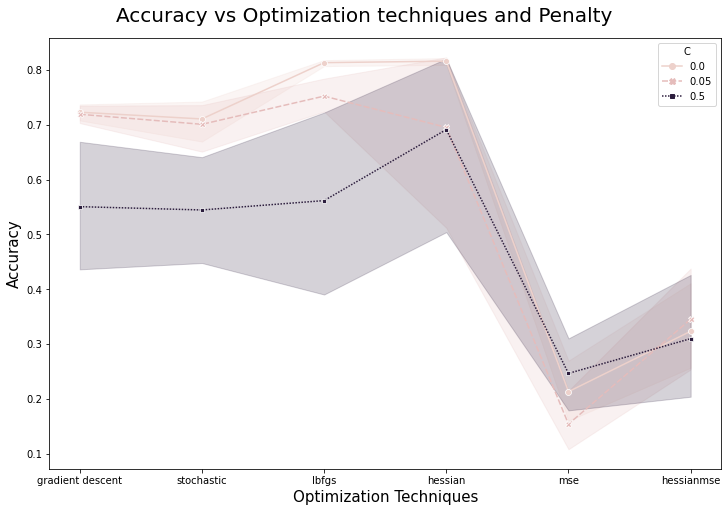

In [22]:
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(10,7), constrained_layout=True)
fig.suptitle('Accuracy vs Optimization techniques and Penalty', fontsize=20)
plt.xlabel('Optimization Techniques', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

sns.lineplot(data=df_result, x="solver", y="Avg Accuracy", hue="C", style="C", markers=True );

We ran our test function with the combination of the following arguments:
<br/>
<b>optimization</b> = ['gradient descent', 
                'stochastic', 
                'lbfgs', 
                'hessian', 
                'mse',
                'hessianmse']
<br/>
<b> c_values </b> = [0, .05, .5]
<br/>
<b> eta_values </b> = [0.01, 0.1]
<br/>
<b> penalty_list </b> = ['none', 'l1', 'l2', 'l1l2']
<br/>

As the above plot shows, the accuracy varies with optimization techniques and penalty values. In this test run, the best accruacy is achieved either when optimization techniques is BFGS or  Hessian technique with C value close to 0. When penalty value increases Hessian performs better than other techniques.

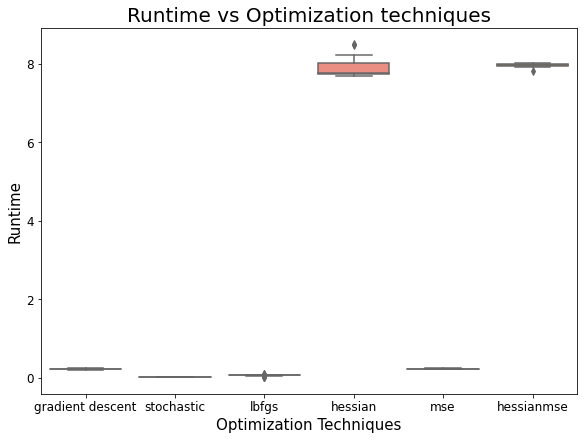

In [23]:
df_tmp = copy.deepcopy(df_result)
df_tmp['Avg runtime'] = pd.to_numeric(df_tmp["Avg runtime"], downcast="float")

plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)

avg_runtime_plot = sns.boxplot(y="Avg runtime", 
                     x="solver", 
                     data=  df_tmp,
                     palette="Set3")

avg_runtime_plot.axes.set_title('Runtime vs Optimization techniques', fontsize=20)
avg_runtime_plot.set_xlabel('Optimization Techniques', fontsize=15)
avg_runtime_plot.set_ylabel('Runtime', fontsize=15)
avg_runtime_plot.tick_params(labelsize=12)

The average runtime of Hessain and HessianMSE is significantly longer than other optimization techniques.
The average runtime of gradient descent, stochastic, BFGS , and MSE is less than 400ms. Hessian and Hessian MSE average runtime is between 7 to 10 seconds. 

### Is there any "data snooping" involved with an exhaustive search of optimal parameters?
Yes, there is data snooping involved in the model search because the dataset is used multiple times for model selection. Data being reused increase the possibility discovering a satisfactory model which may be due to chance rather than any inherit merit of the model[8]. 

### Model performance comparison with Sickit Learn

In [24]:
%time

from sklearn.linear_model import LogisticRegression as SKLogisticRegression

optimization = ['lbfgs', 'newton-cg']
c_values = [0.01, 0.1, .5 , 1 , 2]
penalty_list = ['l2']



df_result_sk = pd.DataFrame(columns=['solver', 'penalty', 'Avg Accuracy', 'Avg runtime', 'C'])

for o in optimization:
    for c in c_values:
            for r in penalty_list:
                acc = []
                runtime_list = []
                lr_sk = SKLogisticRegression(solver= o,
                                                     C = c,
                                                     penalty = r,
                                                     max_iter=300)
                for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
                        start_time = timeit.default_timer()
                        lr_sk.fit(X[train_indices],y[train_indices])  # train object
                        elapsed =  float("{:.2f}".format(timeit.default_timer() - start_time))
                        runtime_list.append(elapsed)
                        y_hat = lr_sk.predict(X[test_indices]) # get test set precitions
                        acc.append(mt.accuracy_score(y[test_indices],y_hat))
                        
                df_result_sk = df_result_sk.append({
                                              'solver': o,
                                              'penalty': r, 
                                               'Avg Accuracy': np.mean(acc),
                                               'Avg runtime':  "{:.3f}".format(np.mean(runtime_list)), 
                                               'C': c} , ignore_index=True)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


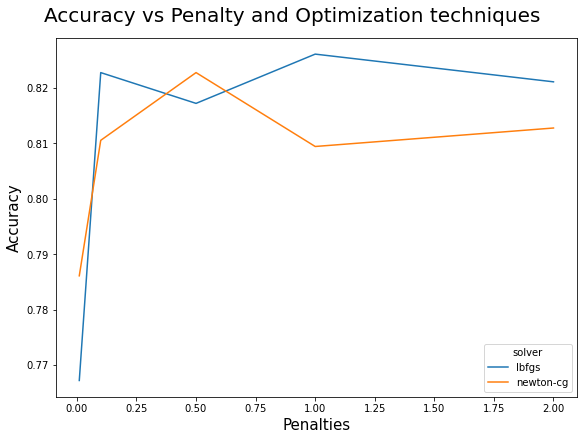

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)
fig.suptitle('Accuracy vs Penalty and Optimization techniques', fontsize=20)
plt.xlabel('Penalties', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

sns.lineplot(data=df_result_sk, x="C", y="Avg Accuracy", hue="solver" , markers=True);


The plot demonstrates that BFGS has a better performance when the penalty is close to 0 or close to 1. Newton-CG method has an overall lower accuracy than BFGS with different C values but still can exceed 80 percent.

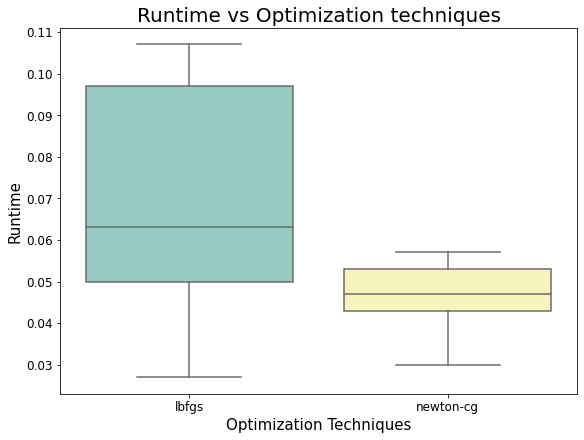

In [26]:
df_tmp = copy.deepcopy(df_result_sk)
df_tmp['Avg runtime'] = pd.to_numeric(df_tmp["Avg runtime"], downcast="float")

plt.subplots(1, 1, figsize=(8,6), constrained_layout=True)

avg_runtime_plot = sns.boxplot(y="Avg runtime", 
                     x="solver", 
                     data =  df_tmp,
                     palette="Set3")

avg_runtime_plot.axes.set_title('Runtime vs Optimization techniques', fontsize=20)
avg_runtime_plot.set_xlabel('Optimization Techniques', fontsize=15)
avg_runtime_plot.set_ylabel('Runtime', fontsize=15)
avg_runtime_plot.tick_params(labelsize=12)

The average runtime of BFGS is significantly longer than Newton-CG. However, both methods runtime are below 110ms

## Exceptional Work



#### Optimization technique for logistic regression using mean square error (MSE) as the objective function


Mean square error (MSE) as the objective function with a L2 regularization term is defined as:

$$ L= MSE = \frac{1}{M}\sum_{i=1}^{M}(y^{(i)} - g(\mathbf{w}^{T}x^{(i)}))^{2} + C\cdot\sum_j w_j^2$$

Here we add a L2 regularization term as a penalty because the objective is to minimize MSE. 

The gradient is

$$\frac{\partial{L}}{\partial{w_{j}}} = \frac{1}{M}\sum_{i=1}^{M}2(y^{(i)} - g(\mathbf{w}^{T}x^{(i)}))[-g(\mathbf{w}^{T}x^{(i)})(1-g(\mathbf{w}^{T}x^{(i)}))x^{(i)}_{j}] + C \cdot 2w_j$$

Notice that $\hat{y}^{(i)} = g(\mathbf{w}^{T}x^{(i)})$. To simplify the notations, let $g$ denote $g(\mathbf{w}^{T}x^{(i)})$. Then, 
$$\frac{\partial{L}}{\partial{w_{j}}} = \frac{1}{M}\sum_{i=1}^{M}2(y^{(i)} - g)[-g(1-g)x^{(i)}_{j}]+  C \cdot 2w_j$$

$$ \nabla l(\mathbf{w}) = \frac{1}{M}(-2)\mathbf{X}^{T}\cdot(y_{diff}*\hat{y}*(1-(\hat{y}))) + C \cdot 2 \mathbf{w}$$
Note: $\cdot$ indicates matrix multiplication. $*$ indicates element-wise multiplication.

Update the coefficients using:

$$ \mathbf{w} \leftarrow \mathbf{w} - \eta \nabla l(\mathbf{w})$$

In [27]:
# MSE as the objective function
# vectorized gradient calculation with regularization using L2 Norm 
#(in the regression class we modify this function to apply other regularization techniques)
def _get_gradient(self,X,y):
    ypred = self.predict_proba(X,add_bias=False).ravel()
    ydiff = y - ypred
    # get y difference
    gradient = (-2)*np.mean(X * (ydiff[:,np.newaxis]*ypred[:,np.newaxis]*(1-ypred[:,np.newaxis])), axis=0)
    # make ydiff a column vector and multiply through
        
    gradient = gradient.reshape(self.w_.shape)
    gradient[1:] -= -2 * self.w_[1:] * self.C
        
    return gradient

## Newton's Update Method

To implement an optimization technique, we use an new update that is defined by Newton's method:

$$ w \leftarrow w - \underbrace{[\frac{\partial^2}{\partial w}l(w)]^{-1}}_{\text{inverse 2nd deriv}}\underbrace{\frac{\partial}{\partial w}l(w)}_{\text{derivative}}  $$

In multiple dimensions we can approximate the update as:

$$ \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \underbrace{\mathbf{H}(\mathbf{w})^{-1}}_{\text{inverse Hessian}}\cdot\underbrace{\nabla l(\mathbf{w})}_{\text{gradient}}$$

where the Hessian is defined as follows for any multivariate equation $l(\mathbf{w})$:
$$ \nabla^2 l(\mathbf{w}) = \mathbf{H}(\mathbf{w})   $$

$$  \mathbf{H}(\mathbf{w}) =  \begin{bmatrix}
        \frac{\partial^2}{\partial w_1}l(\mathbf{w}) &  \frac{\partial}{\partial w_1}\frac{\partial}{\partial w_2}l(\mathbf{w}) & \ldots     & \frac{\partial}{\partial w_1}\frac{\partial}{\partial w_N}l(\mathbf{w})  \\
        \frac{\partial}{\partial w_2}\frac{\partial}{\partial w_1}l(\mathbf{w})  & \frac{\partial^2}{\partial w_2}l(\mathbf{w}) &  \ldots     & \frac{\partial}{\partial w_2}\frac{\partial}{\partial w_N}l(\mathbf{w})  \\
        &  \vdots &\\
        \frac{\partial}{\partial w_N}\frac{\partial}{\partial w_1}l(\mathbf{w})  & \frac{\partial}{\partial w_N}\frac{\partial}{\partial w_2}l(\mathbf{w}) &  \ldots     & \frac{\partial^2}{\partial w_N}l(\mathbf{w}) \\
     \end{bmatrix}
$$


For logistic regression, we can calculate the formula for the $j^{th}$ and $k^{th}$ element of the Hessian as follows:

$$ \mathbf{H}_{j,k}(\mathbf{w}) = \frac{\partial}{\partial w_k} \underbrace{\frac{\partial}{\partial w_j}l(\mathbf{w})}_{\text{first derivative}} $$

But we already know the result of the $j^{th}$ partial derivative from our calculation of $\nabla l(\mathbf{w})$: 
$$\frac{\partial{L}}{\partial{w_{j}}} = \sum_{i=1}^{M}2(y^{(i)} - g)[-g(1-g)x^{(i)}_{j}]+  C \cdot 2w_j$$

So we can get the second partial derivatives:

$$ 
\begin{split}
\mathbf{H}_{j,k}(\mathbf{w}) 
& = \frac{\partial}{\partial w_k} \underbrace{\frac{\partial}{\partial w_j}L}_{\text{first derivative}} \\
& = -2\sum_{i=1}^M{x_k}^{(i)}{x_j}^{(i)}\{(y^{(i)} + y^{(i)}*2g-2g-3g^{3} )*g*(1-g)\}\\
\end{split}
$$




More succintly, we can derive the vectorized form:



$$ \mathbf{H}[L(\mathbf{w})] =  -2*\mathbf{X}^T \cdot \text{diag}\left[(\mathbf{y} + \mathbf{y}*2\mathbf{g}-2\mathbf{g}-3\mathbf{g}^{3} )*\mathbf{g}*(1-\mathbf{g})\right]\cdot \mathbf{X}$$

___

Now we can place the Hessian derivation into the Newton Update Equation, like this:

$$ \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot \underbrace{\mathbf{H}[L(\mathbf{w})]^{-1}}_{\text{inverse Hessian}}\cdot\underbrace{\nabla l(\mathbf{w})}_{\text{gradient}}$$

Adding in the exact equations for the Hessian and gradient, we can finally get:

$$ \mathbf{w} \leftarrow \mathbf{w} - \eta \cdot\big\{ \underbrace{-2*\mathbf{X}^T \cdot \text{diag}\left[(\mathbf{y} + \mathbf{y}*2\mathbf{g}-2\mathbf{g}-3\mathbf{g}^{3} )*\mathbf{g}*(1-\mathbf{g})\right]\cdot \mathbf{X}\big\}^{-1} }_{\text{inverse Hessian}} \cdot \underbrace{\mathbf{X}\odot y_{diff}}_{\text{gradient}}$$

In [28]:
from numpy.linalg import pinv

#(in the regression class we modify this function to apply other regularization techniques)
def _get_gradient(self,X,y):
    ypred = self.predict_proba(X,add_bias=False).ravel()
    # get y difference
    ydiff = y - ypred
       
    hessian = -2*X.T @ (np.diag((y+y*2*ypred-2*ypred-3*ypred*ypred*ypred)*ypred*(1-ypred)))@X 
        
    gradient = (-2)*np.sum(X * (ydiff[:,np.newaxis]*ypred[:,np.newaxis]*(1-ypred[:,np.newaxis])), axis=0)
    # make ydiff a column vector and multiply through
        
    gradient = gradient.reshape(self.w_.shape)
    gradient[1:] += 2 * self.w_[1:] * self.C
        
    return pinv(hessian) @ gradient

Theoretically, we can prove that MSE as an objective function for logistic regression is not a good option. That is because the objective function is not strictly convex. Thus, if we want to minimize the objective function by using the gradient descent approach to find the optimal coefficients, we may get stuck in the local minimum and not find the global minimum. Therefore, using MSE as an objective function is not recommended. On the other hand, maximum likelihood as an objective function is strictly convex, and it is a better choice than MSE. 

### Model performance comparison with Scikit Learn results:




For our logistic regression model, BFGS and Hessian showed a better result compared to other methods. Although Hessian had slightly better accuracy, its runtime is significantly higher than BFGS. Therefore, BFGS is the best method for this dataset if our implementation is used. In scikit-learn, BFGS and Newton-CG approaches produced close accuracy with optimized values, but Newton-CG runs faster. 

Looking at the results, "scikit-learn" and our approach have about 80 percent accuracy with optimized arguments. As the accuracy goal is set to 80 percent, both of these methods achieved the expected result. The average runtime of Newton-CG in "scikit-learn" is about 40ms compared to our BFGS  runtime, which is about 400ms. The model of this dataset is intended to run offline. Therefore our approach and "scikit-learn" performance both are satisfactory.

In terms of runtime speed and accuracy, "scikit-learn" Newton-CG is the winner and is recommended as the best method to model this dataset.

## References

[1] https://www.theacsi.org/industries/travel/airline

[2] https://www.jdpower.com/business/press-releases/2020-north-america-airline-satisfaction-study

[3] Filipe R. Lucini, Leandro M. Tonetto, Flavio S. Fogliatto, Michel J. Anzanello,
Text mining approach to explore dimensions of airline customer satisfaction using online customer reviews,
Journal of Air Transport Management, Volume 83, 2020, 101760, ISSN 0969-6997, https://doi.org/10.1016/j.jairtraman.2019.101760. (https://www.sciencedirect.com/science/article/pii/S0969699719302959)

[4] Airline Passenger Satisfaction dataset https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

[5] scikit-learn Version 0.24.1 LogisticRegression API https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression



[6] MSE as a loss function for logistic regression https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c

[7] scikit-learn Version 0.24.1 section 1.1.11 Logistic Regression User Guide https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[8] White. A reality check for data snooping, Econometrica, Volume 68, NO.5, 1097-1126.  https://www.jstor.org/stable/2999444?seq=1#metadata_info_tab_contents